# 003. Zenodo Analysis

The goal of this script is to be able to extract metadata from zenodo repositories. 

In [18]:
COMMUNITIES_OF_INTEREST = ['epfl','epfl-chili','petersen-lab-data']

In [19]:
from dotenv import dotenv_values

config = dotenv_values(".env")

ZENODO_TOKEN = config['ZENODO_TOKEN']

In [20]:
import pandas as pd
import requests

d = {'community':[], 'doi':[], 'title':[], 'html':[], 'description':[], 'keywords':[], 'license_id':[], 'publication_date':[], 'created':[], 'updated':[],
    'resource_type':[], 'version_downloads':[], 'version_unique_downloads':[], 'version_views':[], 'version_unique_views':[], 'creators':[],
    'conceptdoi':[]}

for community in COMMUNITIES_OF_INTEREST:

    response = requests.get('https://zenodo.org/api/records/?sort=mostrecent&page=1&size=1000',
                            params={'communities': community, 
                                    'access_token': ZENODO_TOKEN})

    hits = response.json()['hits']['hits']

    for item in hits:
        try:
            d['conceptdoi'].append(item['conceptdoi'])
        except:
            d['conceptdoi'].append(None)

        try:
            d['created'].append(item['created'])
        except:
            d['created'].append(None)

        try:
            d['doi'].append(item['doi'])
        except:
            d['doi'].append(None)

        try:
            d['html'].append(item['links']['html'])
        except:
            d['html'].append(None)

        try:
            d['creators'].append(item['metadata']['creators'])
        except:
            d['creators'].append(None)

        try:
            d['description'].append(item['metadata']['description'])
        except:
            d['description'].append(None)

        try:
            d['keywords'].append(item['metadata']['keywords'])
        except:
            d['keywords'].append(None)
        try:
            d['license_id'].append(item['metadata']['license']['id'])
        except:
            d['license_id'].append(None)

        d['publication_date'].append(item['metadata']['publication_date'])
        d['resource_type'].append(item['metadata']['resource_type']['title'])
        d['title'].append(item['metadata']['title'])
        d['version_downloads'].append(item['stats']['version_downloads'])
        d['version_unique_downloads'].append(item['stats']['version_unique_downloads'])
        d['version_views'].append(item['stats']['version_views'])
        d['version_unique_views'].append(item['stats']['version_unique_views'])
        d['updated'].append(item['updated'])
        d['community'].append(community)


zenodoDF = pd.DataFrame(d)

zenodoDF["publication_date"] = pd.to_datetime(zenodoDF["publication_date"])
zenodoDF["created"] = pd.to_datetime(zenodoDF["created"])
zenodoDF["updated"] = pd.to_datetime(zenodoDF["updated"])
zenodoDF["year"] = zenodoDF["publication_date"].dt.year


In [21]:
zenodoDF

,community,doi,title,html,description,keywords,license_id,publication_date,created,updated,resource_type,version_downloads,version_unique_downloads,version_views,version_unique_views,creators,conceptdoi,year
0,epfl,10.5281/zenodo.7628651,"Supplementary datasets for the manuscript ""Gen...",https://zenodo.org/record/7628651,<p>Supplementary files containing datasets nee...,"[metabolism, integration of omics data, large-...",CC-BY-4.0,2023-02-10,2023-02-10 13:40:55.424394+00:00,2023-02-11 02:27:01.836566+00:00,Dataset,0.0,0.0,7.0,3.0,"[{'affiliation': 'EPFL', 'name': 'Choudhury, S...",10.5281/zenodo.7628650,2023
1,epfl,10.3389/frvir.2023.1073549,Unintentional synchronization with self-avatar...,https://zenodo.org/record/7614495,<p>The subjective experience of embodying an a...,"[virtual reality, Sense of embodiment, Sense o...",CC-BY-4.0,2023-02-07,2023-02-07 07:54:10.115967+00:00,2023-02-08 02:26:58.896644+00:00,Dataset,3.0,2.0,11.0,11.0,"[{'affiliation': 'EPFL', 'name': 'Loën Boban',...",None,2023
2,epfl,10.5281/zenodo.7530512,A striatal circuit balances learned fear in th...,https://zenodo.org/record/7530512,<p>This repository stores the raw data that ga...,"[fear memory, auditory fear conditioning, tail...",CC-BY-4.0,2023-01-30,2023-01-30 14:35:05.287938+00:00,2023-02-02 02:27:09.263189+00:00,Dataset,35.0,27.0,53.0,38.0,[{'affiliation': 'Laboratory of Synaptic Mecha...,10.5281/zenodo.4003653,2023
3,epfl,10.5281/zenodo.7572629,Large-eddy Simulation of a Wind-turbine Array ...,https://zenodo.org/record/7572629,<p>Dataset of the paper &quot;Large-eddy Simul...,None,CC-BY-4.0,2022-01-11,2023-01-26 10:30:43.193273+00:00,2023-01-26 14:26:44.218745+00:00,Dataset,91.0,15.0,119.0,93.0,[{'affiliation': 'École Polytechnique Fédérale...,10.5281/zenodo.5838647,2022
4,epfl,10.5281/zenodo.7562332,A Multimodal Dataset for Automatic Edge-AI Cou...,https://zenodo.org/record/7562332,<p>Counting the number of times a patient coug...,"[edge-AI, automatic cough detection, multimoda...",CC-BY-4.0,2023-01-23,2023-01-23 18:02:29.825540+00:00,2023-01-25 08:37:53.323608+00:00,Dataset,1.0,1.0,19.0,14.0,[{'affiliation': 'Embedded Systems Laboratory ...,10.5281/zenodo.7562331,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,petersen-lab-data,10.5281/zenodo.3271408,"Data set for ""Distinct contributions of whiske...",https://zenodo.org/record/3271408,"<p>Data set for: Mayrhofer JM, El-Boustani S, ...","[Reward-based learning, Goal-directed sensorim...",CC-BY-4.0,2019-08-08,2019-08-19 14:22:38.625527+00:00,2020-01-24 19:24:57.737783+00:00,Dataset,449.0,283.0,357.0,329.0,"[{'affiliation': 'EPFL', 'name': 'Mayrhofer, J...",10.5281/zenodo.3271407,2019
316,petersen-lab-data,10.5281/zenodo.1304771,"Data set for ""State-dependent cell-type-specif...",https://zenodo.org/record/1304771,"<p>Data set for: Pala A, Petersen CCH (2018) S...","[Neuroscience, Neocortex, Membrane potential, ...",CC-BY-4.0,2018-07-27,2018-07-30 15:10:38.572372+00:00,2020-01-24 19:23:30.045898+00:00,Dataset,767.0,279.0,408.0,370.0,[{'affiliation': 'École Polytechnique Fédérale...,10.5281/zenodo.1304770,2018
317,petersen-lab-data,10.5281/zenodo.1220711,"Data set for ""Diverse long-range axonal projec...",https://zenodo.org/record/1220711,"<p>Data set for: Yamashita T, Vavladeli A, Pal...","[neocortex, barrel cortex, projection neurons,...",CC-BY-4.0,2018-05-01,2018-05-01 06:45:17.897662+00:00,2020-01-24 19:25:14.837610+00:00,Dataset,846.0,583.0,330.0,310.0,"[{'name': 'Yamashita, Takayuki'}, {'name': 'Va...",10.5281/zenodo.1220710,2018
318,petersen-lab-data,10.5281/zenodo.1063898,"Data set for ""Reward-based learning drives rap...",https://zenodo.org/record/1063898,"<p>Data set for: Le Merre P, Esmaeili V, Charr...","[learning, sensory processing, whisker, somato...",CC-BY-4.0,2017-12-14,2017-12-15 08:32:21.901209+00:00,2020-01-24 19:26:06.003227+00:00,Dataset,1322.0,434.0,605.0,570.0,[{'affiliation': 'École Polytechnique Fédérale...,10.5281/zenodo.1063897,

## Unique Views vs Unique Downloads

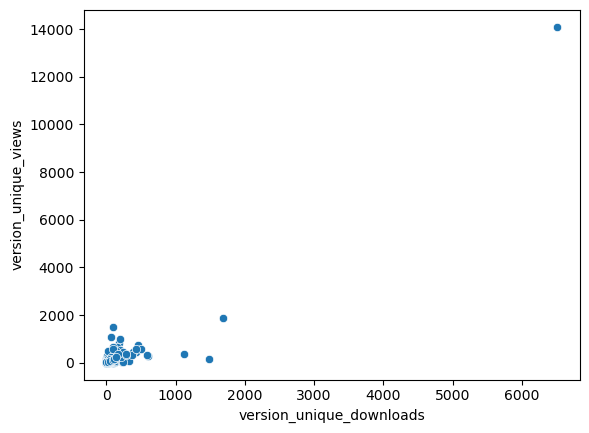

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=zenodoDF, x="version_unique_downloads", y="version_unique_views")
plt.show()

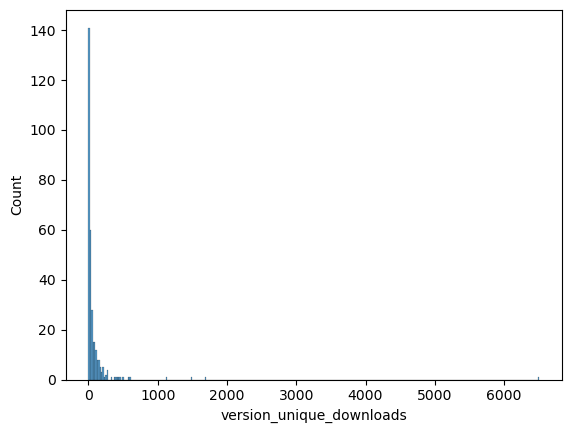

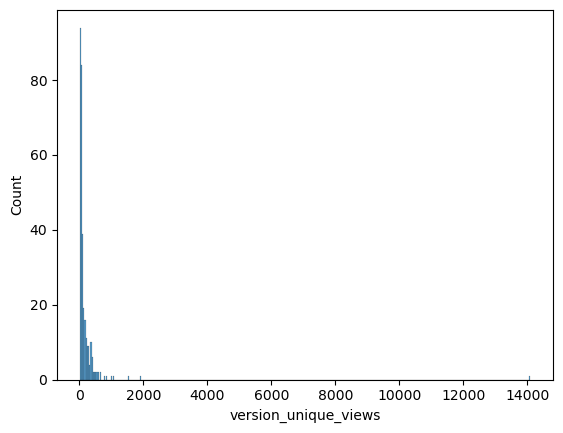

In [7]:
sns.histplot(data=zenodoDF, x="version_unique_downloads")
plt.show()

sns.histplot(data=zenodoDF, x="version_unique_views")
plt.show()

## License distribution

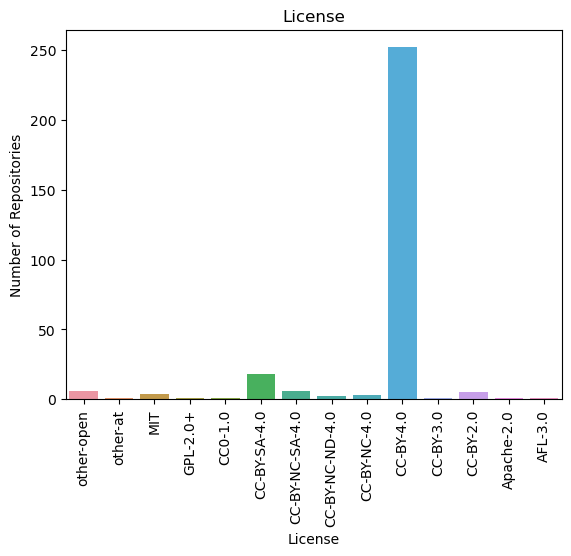

In [8]:
licenseDf = zenodoDF.groupby('license_id').count().sort_values(by=['license_id'], ascending=False).reset_index()

ax = sns.barplot(data=licenseDf, x='license_id', y='doi')
ax.set(xlabel='License', ylabel='Number of Repositories')
plt.title("License")
plt.xticks(rotation=90)
plt.show()

## Repository Type Distribution

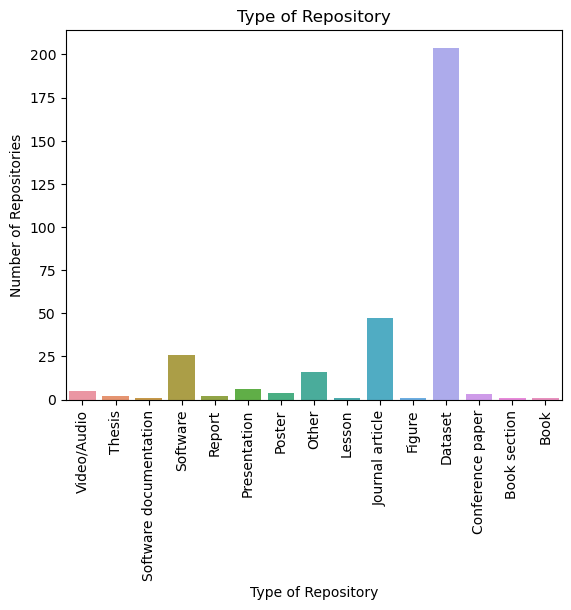

In [9]:
typeDF = zenodoDF.groupby('resource_type').count().sort_values(by=['resource_type'], ascending=False).reset_index()

ax = sns.barplot(data=typeDF, x='resource_type', y='version_unique_downloads', ci=None)
ax.set(xlabel='Type of Repository', ylabel='Number of Repositories')
plt.title("Type of Repository")
plt.xticks(rotation=90)
plt.show()

## Publication Date Distribution

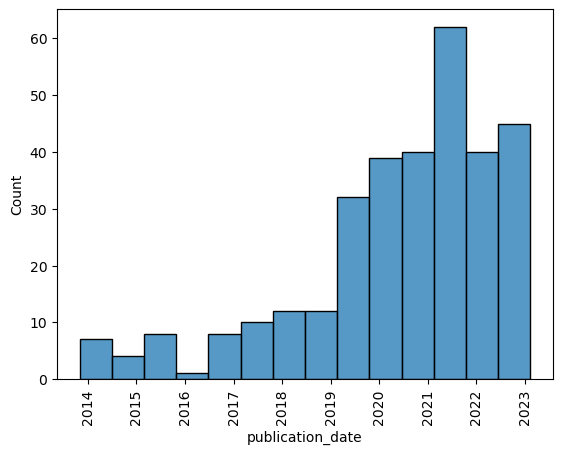

In [10]:
sns.histplot(data=zenodoDF, x="publication_date")
plt.xticks(rotation=90)
plt.show()

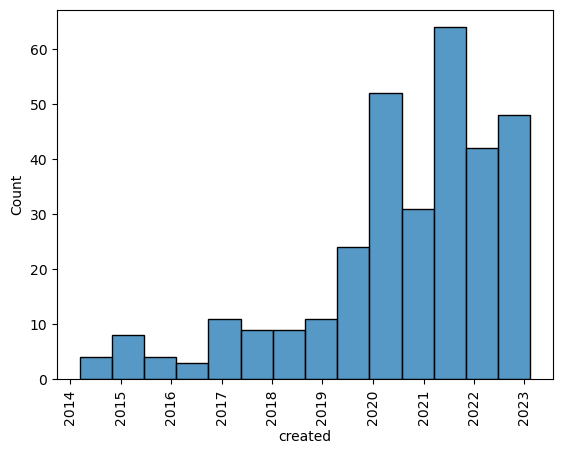

In [11]:
sns.histplot(data=zenodoDF, x="created")
plt.xticks(rotation=90)
plt.show()

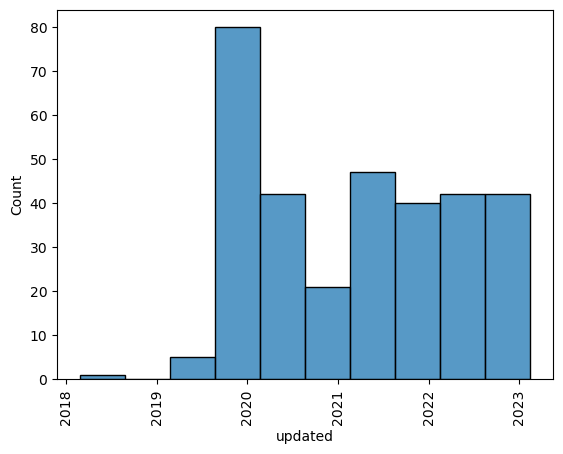

In [12]:
sns.histplot(data=zenodoDF, x="updated")
plt.xticks(rotation=90)
plt.show()

## Tableau Plots

## Ratio calculation per year

In [24]:
### Ratio Downloads/Repositories per year 
from datetime import datetime

aggregatedDF = zenodoDF.groupby(zenodoDF['year']).sum()
aggregatedDF["NRepositories"] =  zenodoDF.groupby(zenodoDF['year'])['doi'].count()

aggregatedDF["Downloads/Repositories"] = aggregatedDF['version_unique_downloads']/aggregatedDF['NRepositories']
aggregatedDF["Views/Repositories"] = aggregatedDF['version_unique_views']/aggregatedDF['NRepositories']

aggregatedDF = aggregatedDF.reset_index()
aggregatedDF

,year,version_downloads,version_unique_downloads,version_views,version_unique_views,NRepositories,Downloads/Repositories,Views/Repositories
0,2013,32.0,30.0,188.0,167.0,5,6.000000,33.400000
1,2014,1670.0,651.0,1790.0,1645.0,5,130.200000,329.000000
2,2015,1170.0,571.0,3495.0,3277.0,10,57.100000,327.700000
3,2016,222.0,134.0,379.0,359.0,6,22.333333,59.833333
4,2017,3469.0,1604.0,3371.0,2985.0,16,100.250000,186.562500
5,2018,4240.0,2263.0,4816.0,4339.0,18,125.722222,241.055556
6,2019,8441.0,4972.0,5827.0,5161.0,39,127.487179,132.333333
7,2020,21444.0,7783.0,14145.0,12463.0,69,112.797101,180.623188
8,2021,13549.0,9107.0,27289.0,22822.0,81,112.432099,281.753086
9,2022,2663.0,1640.0,4571.0,3821.0,60,27.333333,63.683333


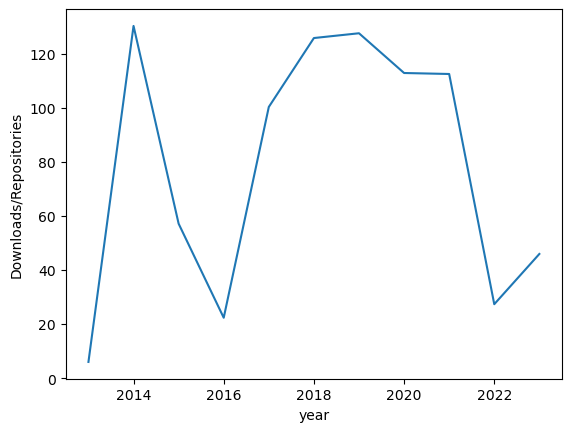

In [25]:
ax = sns.lineplot(data=aggregatedDF, x='year', y='Downloads/Repositories', ci=None)

# ax.set(xlabel='Type of Repository', ylabel='Number of Repositories')
# plt.title("Type of Repository")
# plt.xticks(rotation=90)
plt.show()

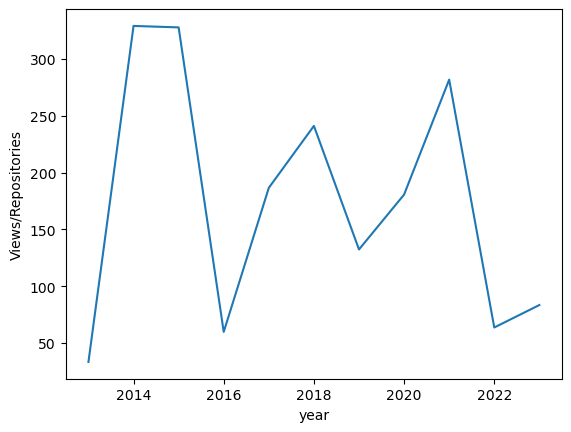

In [26]:
ax = sns.lineplot(data=aggregatedDF, x='year', y='Views/Repositories', ci=None)

# ax.set(xlabel='Type of Repository', ylabel='Number of Repositories')
# plt.title("Type of Repository")
# plt.xticks(rotation=90)
plt.show()

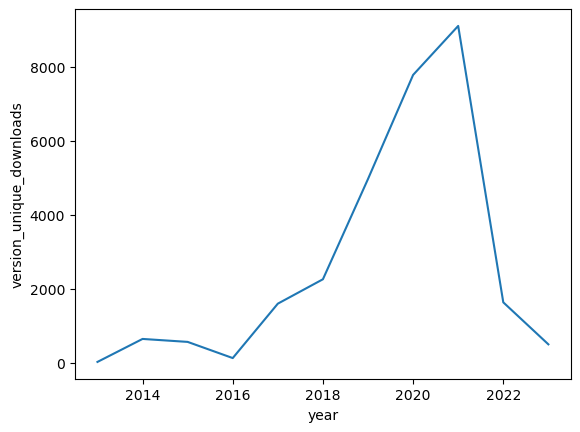

In [27]:
ax = sns.lineplot(data=aggregatedDF, x='year', y='version_unique_downloads', ci=None)

# ax.set(xlabel='Type of Repository', ylabel='Number of Repositories')
# plt.title("Type of Repository")
# plt.xticks(rotation=90)
plt.show()

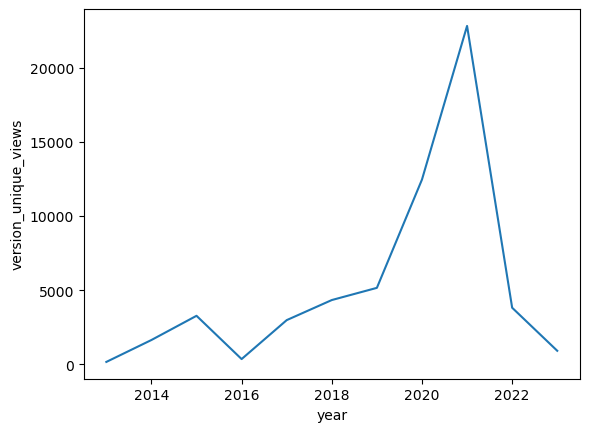

In [28]:
ax = sns.lineplot(data=aggregatedDF, x='year', y='version_unique_views', ci=None)

# ax.set(xlabel='Type of Repository', ylabel='Number of Repositories')
# plt.title("Type of Repository")
# plt.xticks(rotation=90)
plt.show()

## Export

In [29]:
zenodoDF['publication_date'] = zenodoDF['publication_date'].dt.tz_localize(None)
zenodoDF['created'] = zenodoDF['created'].dt.tz_localize(None)
zenodoDF['updated'] = zenodoDF['updated'].dt.tz_localize(None)

zenodoDF.to_excel(f"results/Zenodo_ALLCOMM_Repositories.xlsx")  
zenodoDF.to_json(f"results/Zenodo_ALLCOMM_Repositories.json", orient="records", date_format="iso")

In [30]:
aggregatedDF.to_excel(f"results/Zenodo_ALLCOMM_AggregatedStats.xlsx")  
aggregatedDF.to_json(f"results/Zenodo_ALLCOMM_AggregatedStats.json", orient="records", date_format="iso")